In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [91]:
pd.set_option('display.max_columns', None)
pd.set_option('max_row', None)
pd.set_option('display.expand_frame_repr', False)


In [92]:
df = pd.read_csv('clean_salary_data.csv')
df2 = df.drop_duplicates()

In [93]:
df2['age'] = df2.Founded.apply(lambda x: x if x <1 else 2021 - x)

C:\Users\jjcas\AppData\Local\Temp/ipykernel_7568/4157498090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2.Founded.apply(lambda x: x if x <1 else 2021 - x)


<AxesSubplot:>

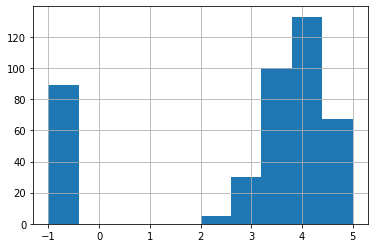

In [94]:
df2.Rating.hist()

<AxesSubplot:>

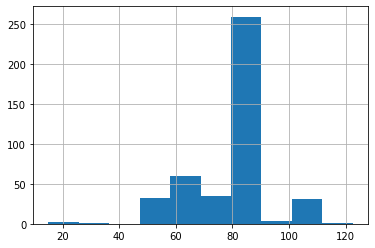

In [95]:
df2.avg_salary.hist()

<AxesSubplot:>

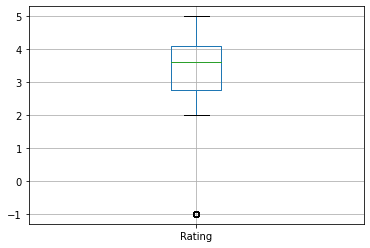

In [96]:
df2.boxplot(column= 'Rating')

In [97]:
df2[['age', 'avg_salary', 'Rating']].corr()

,age,avg_salary,Rating
age,1.000000,-0.012909,0.393862
avg_salary,-0.012909,1.000000,0.093106
Rating,0.393862,0.093106,1.000000


<AxesSubplot:>

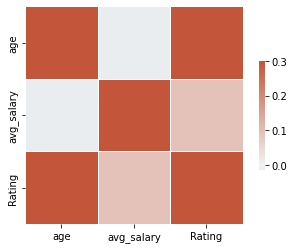

In [98]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df2[['age', 'avg_salary', 'Rating']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [99]:
pd.pivot_table(df2, index= 'job_state', values= "avg_salary").sort_values('avg_salary', ascending= False)

,avg_salary
job_state,
KY,102.500000
TN,87.500000
HI,87.500000
ME,87.500000
SC,85.250000
PA,85.214286
IL,84.625000
DC,83.400000
OH,83.125000


In [100]:
df2_pivots = df2[['Industry', 'Sector', 'Revenue', 'excel', 'python', 'Type of ownership', 'avg_salary']]

In [101]:
for i in df2_pivots.columns:
    try:
        print(i)
        print(pd.pivot_table(df2_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))
    except Exception:
        pass

Industry
                                         avg_salary
Industry                                           
Utilities                                102.500000
Airlines                                  90.000000
Research & Development                    87.500000
Other Retail Stores                       87.500000
Staffing & Outsourcing                    85.754717
Industrial Manufacturing                  85.250000
Beauty & Personal Accessories Stores      85.200000
Logistics & Supply Chain                  84.500000
Internet                                  84.050000
Aerospace & Defense                       83.875000
Biotech & Pharmaceuticals                 83.000000
IT Services                               82.242424
Insurance Carriers                        81.615385
Consulting                                80.214286
Health Care Services & Hospitals          79.923077
Advertising & Marketing                   78.714286
Accounting                                78.333333
Com